# Summary: Single Layer Neural Networks from a Statistical Perspective
(based on "Introduction to statistical learning")

## Conceptual Overview
- **Purpose**: A neural network aims to build a nonlinear function `f(X)` to predict the response `Y`, using an input vector of variables `X = (X1, X2, ..., Xp)`.
- **Distinction**: Unlike trees, boosting, and generalized additive models, neural networks have a unique structure characterized by layers and units.

## Neural Network Model
- **Input Layer**: Consists of features `X1, ..., Xp` as units.
- **Hidden Layer**: Each input feeds into `K` hidden units (in this example, `K=5`).
- **Model Representation**:
  $$ f(X) = β0 + ∑_{k=1}^{K} βk g(wk0 + ∑_{j=1}^{p} wkj Xj) $$
- **Activation Functions**: `g(z)` is a nonlinear function. Popular choices are sigmoid and ReLU (Rectified Linear Unit).

## Activation Functions
- **Sigmoid**: 
  $ g(z) = \frac{1}{1 + e^{-z}} $
- **ReLU**:
  $ g(z) = max(0, z) $
- **Efficiency**: ReLU is preferred for its computational efficiency.

## Computation in Hidden Layer
- **Activations**: Calculated as $Ak = hk(X) = g(wk0 + ∑_{j=1}^{p} wkj Xj)$.
- **Role of Activations**: Similar to basis functions, transforming original features.

## Output Layer
- **Formulation**: The output is a linear regression in the activations `Ak`.
- **Parameters**: Includes both weights `w` and biases `β`, to be estimated from data.

## Nonlinearity and Interaction Effects
- Nonlinear activation functions allow the model to capture complex patterns and interactions.
- Example with quadratic `g(z)` illustrates how nonlinear transformations can model interactions.

## Fitting the Neural Network
- **Loss Function**: Typically squared-error loss for quantitative responses.
- **Optimization**: Minimize the sum of squared errors between predictions and actual values.

*This section is based on the paper "The Neural Network, its Techniques and Applications" by Casey Schafer (2016)*

# Basic Neural Network: Perceptron

A **perceptron** is the most basic form of a neural network. It consists of one layer of inputs (independent variables or features) and one layer of outputs (dependent variables). Let's break down the components and the operation of this network step by step, exemplifying with :

## Layers and Vectors

1. **Layers**: In a perceptron, layers are visualized as a series of nodes (each node corresponding to a variable) aligned vertically.
   - An **input layer** is represented by a vector for one observation. For example, vector `x` is `[x1 x2 ... xn]ᵀ` for "n" features.
   - With k observations and n features, a layer is represented as a matrix `n × k` .

2. **Input Layer (X)**: For a perceptron with two features and `k` observations, the input layer is a `2 × k` matrix (matrix `X`). We are going to model the "mini MNIST" data, which will have (28 x 28) input features and 1.000 observations, so the input layer matrix has a 784 x 1.000 shape.

3. **Output Layer (Y)**: 
   - The output layer (matrix `Y`) is typically `n × p` in this case we will model each possible digit as a binary variable, so it will have 10 x 1.000 shape.
   - `Y` is the predicted output by the network, different from `T` (label matrix), which is the known output in supervised learning.

## Goal of the Neural Network

- The objective is to minimize the difference between the known output `T` and the predicted output `Y`.
- The ideal network predicts `T` accurately using only the inputs.

## Weight Matrix (W)

- To map from `X` to `Y`, we introduce a weight matrix `W`.
- In general, `W` is an `n × m` matrix, where `m` is the number of input nodes, independent of the number of observations. In this case we have 784 input features and 10 output features, so it has a 10 x 784 shape.
- The fundamental equation of the network is: `T = W * X + b`, where `b` is a bias vector.

## Linearization

- To linearize this equation, augment (append as a last column) `W` with `b` as `[W | b]` and add a row of 1’s at the end of matrix `X`, which will be the matrix equivalent of $W*X + b$.
- The equation becomes: `T = [W | b] * [X; 1]`.
- We must redefine the shape of matrix `W` to be `n × (m + 1)` and also change the shape of matrix `X` to be `(m + 1) × p` with a row of 1’s at the bottom.
- We now need to solve $T = WX$

## Solving for W

- We don't "solve" this equation in the traditional sense. Instead, we compute the pseudoinverse of `X` using singular value decomposition (SVD) to find an approximation of `W`, denoted as `Ŵ`.
- We use the "pseudoinverse" instead of the "inverse" of a matrix ($A^-1$) because the pseudoinverse can be used in non-square and in non-invertible matrixes (which is incidentally our case for the MNIST dataset)
- We remember from one of our beloved past notebooks in CS6040 that any matrix A can be expressed as $A = U \Sigma V^T$
- Now the approximation `Ŵ` is calculated as `Ŵ = T * V * Σ⁻¹ * Uᵀ`, where `V`, `Σ`, and `U` are derived from the SVD of `X`.
- This `Ŵ` is a projection onto the column space of `X`.

## Predicted Output (Y)

- The predicted output `Y` is computed as `Y = Ŵ * X`.


## Limitations and Extensions

- This linear algebra method works best if the relationship between `X` and `T` is linear, which is also rare.
- For more complex relationships, we extend the model to a more sophisticated neural network that can handle non-linear functions.

# First implementation

Before going into the more complex model, let's apply what we have defined so far.


## mini-MNIST Dataset loading

We will be working with a subset of the MNIST dataset

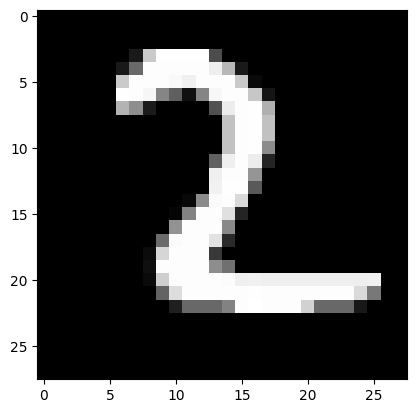

This image is a 2 digit


In [35]:
import pickle

with open('mini-mnist-1000.pickle', 'rb') as f:
    data = pickle.load(f)

images = data['images'] # a list of 1000 numpy image matrices
labels = data['labels'] # a list of 1000 integer labels

# Lets visualize an image

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(images[234], cmap='gray')
plt.show()

print("This image is a", labels[234], "digit")


Given we are working with a simple perceptron, we must flatten each image into a vector of length 784. After we have done that, we can create a single matrix of all the images, where each row is an image vector.

In [28]:
import numpy as np


print("Original image shape:",images[0].shape) # (28, 28)

print("Flattened image shape: ",images[0].flatten().shape)

X = np.array([image.flatten() for image in images])
X = X.T # transpose so that each column is an image vector
print("X shape:",X.shape) # (784,1000)


Original image shape: (28, 28)
Flattened image shape:  (784,)
X shape: (784, 1000)
T shape: (10, 1000)


We also need to convert the labels so that they are one-hot encoded.
Given that each label is an integer between 0 and 9, we can create a 10-dimensional vector for each label row.
The vector will have a 1 in the position of the digit label and 0s everywhere else (a very *sparse* matrix).

In [37]:
T = np.zeros((len(labels), 10))
for i, label in enumerate(labels):
    T[i, label] = 1
T = T.T # transpose so that each column is a label vector
print("T shape:",T.shape) # (10,1000)


T shape: (10, 1000)


Before we start coding, let's make sure we separate our dataset into training and test

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, T_train, T_test = train_test_split(X.T, T.T, test_size=0.2, random_state=42)

X_train = X_train.T
X_test = X_test.T
T_train = T_train.T
T_test = T_test.T

print("X_train shape:",X_train.shape) # (784,800)
print("X_test shape:",X_test.shape) # (784,200)
print("T_train shape:",T_train.shape) # (10,800)
print("T_test shape:",T_test.shape) # (10,200)


X_train shape: (784, 800)
X_test shape: (784, 200)
T_train shape: (10, 800)
T_test shape: (10, 200)


## Coding our first implementation

We are now ready to start coding our simple perceptron implementation. For this very simple algorithm, we won't even need to intialize W and b , because we are estimating W directly from just the labels and X matrix (T_train and X_train, respectively)

In [56]:

def compute_pseudoinverse(X):
    """
    Computes the pseudoinverse of matrix X.
    """
    X_pinv = np.linalg.pinv(X) # For simplicity let's just use numpy's pinv function
    return X_pinv

def train_perceptron(X, T):
    """
    Trains the perceptron using pseudoinverse to find the optimal weights.
    """
    X_pinv = compute_pseudoinverse(X)
    W_hat = np.dot(T, X_pinv)
    return W_hat

def predict(X, W):
    """
    Uses the trained perceptron to predict outputs.
    """
    return np.dot(W, X)

print("X train shape:", X_train.shape)
print("T train shape:", T_train.shape)
print("X:", X_train)
print("T:", T_train)

# Training the perceptron
W_hat = train_perceptron(X_train, T_train)
print("W_hat shape:", W_hat.shape)
print("W_hat:", W_hat)

# Predicting new inputs
new_X = X_test

print("New X shape:", new_X.shape)
print("New X:", new_X)


predictions = predict(new_X, W_hat)

print("Predictions:", predictions)


X train shape: (784, 800)
T train shape: (10, 800)
X: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
T: [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
W_hat shape: (10, 784)
W_hat: [[ 0.00000000e+00  3.12886796e-12 -9.20112965e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.95563456e-12  2.03927817e-10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.69842085e-12  2.03494454e-10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.45313511e-12  2.00398931e-10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.49960861e-12 -1.13510918e-10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.53287261e-12 -3.33712346e-10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
N

In [58]:
# We can now calculate the prediction performance using sklearn performance metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# We need to convert the predictions from a matrix to a vector of labels.
# We can do this by taking the index of the maximum value in each column.

y_pred = np.argmax(predictions, axis=0)
print("Predictions shape:", predictions.shape)
print("y_pred shape:", y_pred.shape)
print("y_pred:", y_pred)

# Now we can calculate the performance metrics.

y_true = np.argmax(T_test, axis=0)
print("y_true shape:", y_true.shape)
print("y_true:", y_true)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("F1 score:", f1_score(y_true, y_pred, average='macro'))


Predictions shape: (10, 200)
y_pred shape: (200,)
y_pred: [3 1 8 8 4 0 6 5 3 1 8 0 6 9 9 8 2 5 7 7 0 1 3 5 8 3 1 1 8 1 3 1 6 4 7 1 6
 5 6 0 5 0 3 9 9 9 9 6 4 9 3 8 2 5 5 0 6 0 9 8 8 0 5 2 6 6 6 8 9 5 1 9 5 7
 3 4 6 0 5 5 8 0 7 0 3 1 1 4 1 4 8 4 5 1 7 4 4 0 0 5 5 1 4 1 6 6 1 9 1 9 1
 8 9 8 5 4 1 9 1 5 0 4 9 6 9 3 6 8 8 8 8 5 2 9 3 0 1 1 0 9 0 8 1 4 8 9 3 5
 6 3 4 1 5 4 9 8 4 6 0 1 8 1 6 3 8 0 0 6 3 3 3 9 1 9 4 3 2 9 8 6 4 5 3 5 0
 1 3 3 9 7 9 8 6 1 2 4 3 6 6 0]
y_true shape: (200,)
y_true: [5 7 7 6 4 6 6 5 8 1 8 0 6 9 9 8 2 8 7 3 5 1 3 5 2 2 1 9 9 9 3 1 6 4 3 1 6
 5 9 0 3 0 3 9 2 2 9 6 4 8 5 8 2 5 0 0 6 0 2 8 2 0 5 2 6 6 6 8 0 5 1 4 5 7
 2 2 6 0 5 3 6 0 2 0 3 5 9 7 7 3 3 4 5 2 7 4 7 0 0 8 7 3 9 2 6 6 5 9 1 9 5
 8 9 8 0 4 1 9 5 2 8 4 7 2 2 5 5 4 8 8 5 8 2 9 5 0 1 2 0 0 0 2 7 2 8 9 8 2
 8 3 6 1 9 4 9 4 3 6 0 8 5 7 6 6 8 6 2 6 3 3 3 4 1 9 4 3 2 2 8 6 4 6 3 5 8
 1 3 3 9 7 9 8 6 1 2 4 3 2 6 0]
Accuracy: 0.59
Precision: 0.6233987770298036
Recall: 0.6088724994811952
F1 score: 0.575120650429488

Wow! Amazing performance from this little perceptron guy! Let's move on to the theory again to introduce a new concept: "hidden" layers.

# Introducing Hidden Layers

We want to be able to model more complex relationships. We could assume that the relationship between the flattened matrix of an image and the digit represented in that image is *not* linear, and instead implies a complex relationship (although this is surprisingly controversial: https://stats.stackexchange.com/questions/426873/how-does-a-simple-logistic-regression-model-achieve-a-92-classification-accurac). To model that increased complexity we can use what is called a "hidden layer".

## Enhanced Structure

In between the input and the output layers, we will add a middle layer. This means that instead of going directly from a 784 dimensional space to a 10 dimensional one, we will go from 784 dimensions, to S dimensions, and from S dimensions to 10 dimensions. Our middle (hidden) layer then is an S dimensional space. For our case we will use 128 dimensions for our hidden layer.

## Weight Matrix and Adaptive Learning

Now for estimating our weight matrix W, we won't estimate it directly from X. Instead we are going to iterate over itself and so we will optimize W in a way. The first version of W will be initialized randomly, and over each iteration we will be *nudging* it, instead of starting from scratch each time.

## Transformation in the Hidden Layer
Let's define "P" as `P = W X`, so kind of how we defined "T" for our perceptron. This will model the hidden layer, but we are now going to add a bit more complexity. We will apply a component-wise function "sigma" to `P` to get `S`, so $P=WX$ and $S = sigma(P)$ 

We will call this "sigma" function an "activation function". This will helps us to model complex non-linear relationships and interaction effects. We will use the sigmoid activation function, which given an input "z" is defined as:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}

$$
After applying sigma, its output will become the input for the next layer, which in our case will be just the output layer.
$$ S = sigma(WX) $$

We could also apply another activation function to the output layer, but for simplicity won't. 


## Output Matrix and Error Calculation

Finally, our output matrix could be defined as our perceptron last time:
$$
Y = WX
$$

But now the input matrix X is actually the output of the hidden layer, and given that both layers have different weight matrixes let's add a subscript to each to differentiate them ("o" for output and "h" for hidden), so:

$$
Y = W_o * sigma(W_h * X)
$$


Like last time, we will try to make the predicted labels to be as close as posible to the real labels. We will now introduce an error function, that will be defined as:

$$E(W_h, W_o) = \sum ||t_k - y_k||^2$$

Where t is a label and y a prediction.


